In [3]:
!pip install rdflib

from rdflib import Graph, Namespace, URIRef, Literal, RDF, RDFS, OWL, XSD

# Creating a new graph
g = Graph()

# Defining namespaces
EX = Namespace("http://www.area.com/ontologies/area_shapes.owl#")
OWL_NS = Namespace("http://www.w3.org/2002/07/owl#")
RDFS_NS = Namespace("http://www.w3.org/2000/01/rdf-schema#")

# Binding namespaces
g.bind("ex", EX)
g.bind("owl", OWL_NS)
g.bind("rdfs", RDFS_NS)

# Ontology declaration
ontology = URIRef("http://www.area.com/ontologies/area_shapes.owl")
g.add((ontology, RDF.type, OWL.Ontology))

# Classes
shape = EX.Shape
triangle = EX.Triangle
square = EX.Square
rectangle = EX.Rectangle

g.add((shape, RDF.type, OWL.Class))
g.add((triangle, RDF.type, OWL.Class))
g.add((triangle, RDFS.subClassOf, shape))
g.add((square, RDF.type, OWL.Class))
g.add((square, RDFS.subClassOf, shape))
g.add((rectangle, RDF.type, OWL.Class))
g.add((rectangle, RDFS.subClassOf, shape))

# Properties
hasBase = EX.hasBase
hasHeight = EX.hasHeight
hasSide = EX.hasSide
hasLength = EX.hasLength
hasWidth = EX.hasWidth

# Adding DatatypeProperties
g.add((hasBase, RDF.type, OWL.DatatypeProperty))
g.add((hasBase, RDFS.domain, triangle))
g.add((hasBase, RDFS.range, XSD.float))

g.add((hasHeight, RDF.type, OWL.DatatypeProperty))
g.add((hasHeight, RDFS.domain, triangle))
g.add((hasHeight, RDFS.range, XSD.float))

g.add((hasSide, RDF.type, OWL.DatatypeProperty))
g.add((hasSide, RDFS.domain, square))
g.add((hasSide, RDFS.range, XSD.float))

g.add((hasLength, RDF.type, OWL.DatatypeProperty))
g.add((hasLength, RDFS.domain, rectangle))
g.add((hasLength, RDFS.range, XSD.float))

g.add((hasWidth, RDF.type, OWL.DatatypeProperty))
g.add((hasWidth, RDFS.domain, rectangle))
g.add((hasWidth, RDFS.range, XSD.float))

# Individuals
example_triangle = EX.ExampleTriangle1
g.add((example_triangle, RDF.type, triangle))
g.add((example_triangle, hasBase, Literal(5.0, datatype=XSD.float)))
g.add((example_triangle, hasHeight, Literal(10.0, datatype=XSD.float)))

example_square = EX.ExampleSquare1
g.add((example_square, RDF.type, square))
g.add((example_square, hasSide, Literal(4.0, datatype=XSD.float)))

example_rectangle = EX.ExampleRectangle1
g.add((example_rectangle, RDF.type, rectangle))
g.add((example_rectangle, hasLength, Literal(6.0, datatype=XSD.float)))
g.add((example_rectangle, hasWidth, Literal(3.0, datatype=XSD.float)))

# Serializing the graph to an OWL file
output_file = "area_shapes.owl"
g.serialize(destination=output_file, format="xml")
print(f"OWL file '{output_file}' created successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.4/562.4 kB 7.4 MB/s eta 0:00:00
OWL file 'area_shapes.owl' created successfully.


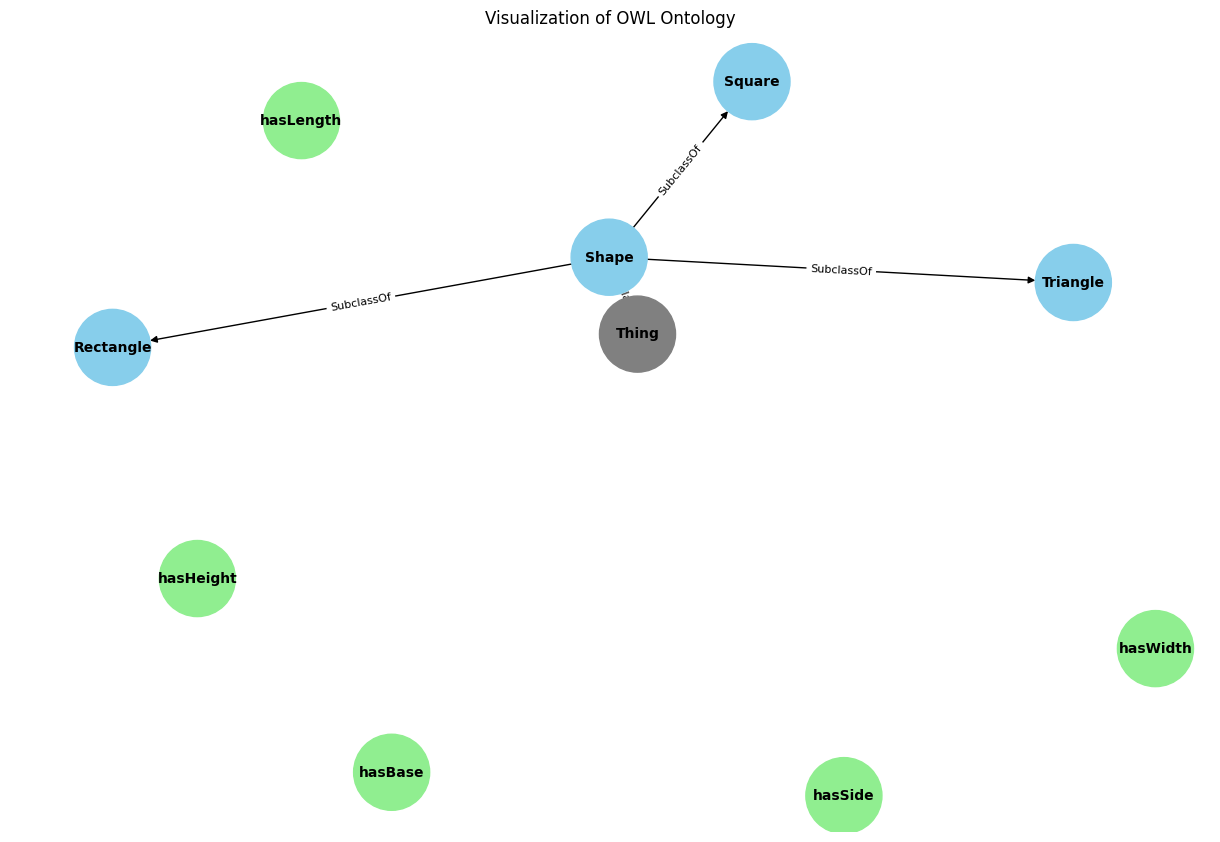

In [13]:
from owlready2 import *
import networkx as nx
import matplotlib.pyplot as plt

# Loading the OWL ontology
ontology_path = "area_shapes.owl"
onto = get_ontology(ontology_path).load()

# Creating a graph
G = nx.DiGraph()

# Adding classes and their relationships
for cls in onto.classes():
    G.add_node(cls.name, type="Class")  # Ensure class nodes have 'type' attribute
    for parent in cls.is_a:
        if isinstance(parent, ThingClass):
            G.add_edge(parent.name, cls.name, relation="SubclassOf")

# Adding properties and their domains/ranges
for prop in onto.properties():
    G.add_node(prop.name, type="Property")  # Ensure property nodes have 'type' attribute
    for domain in prop.domain:
        for range_class in prop.range:
            # Only include class-based ranges, skip datatypes like xsd:float
            if isinstance(range_class, ThingClass):
                G.add_edge(domain.name, range_class.name, relation=prop.name)

# Plotting the graph
plt.figure(figsize=(12, 8))

# Creating a layout
pos = nx.spring_layout(G, k=0.5, seed=42)

# Drawing nodes with colors based on type
node_colors = []
for n in G.nodes():
    # Safely access the 'type' attribute with a default value if it doesn't exist
    node_type = G.nodes[n].get("type", "Unknown")
    color = "skyblue" if node_type == "Class" else "lightgreen" if node_type == "Property" else "gray"
    node_colors.append(color)

# Drawing the graph with the assigned colors
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=3000, font_size=10, font_weight="bold")

# Drawing edges with labels
edge_labels = {(u, v): d["relation"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Visualization of OWL Ontology")
plt.show()

In [14]:
from owlready2 import *
import math

# Loading the ontology
ontology_path = "area_shapes.owl"
onto = get_ontology(ontology_path).load()

# Function to calculate area of different shapes
def calculate_area(shape_type, **kwargs):
    if shape_type == "Square":
        side_length = kwargs.get("side_length")
        if side_length:
            return side_length ** 2
        else:
            return "Missing side length!"

    elif shape_type == "Triangle":
        base = kwargs.get("base")
        height = kwargs.get("height")
        if base and height:
            return 0.5 * base * height
        else:
            return "Missing base or height!"

    else:
        return "Shape not recognized"

# Simple function to provide area based on ontology
def get_shape_area_from_ontology(shape_name):
    shape_class = onto[shape_name]
    area_property = onto.hasArea
    for shape_instance in shape_class.instances():
        area = calculate_area(shape_name, **shape_instance.get_properties())
        print(f"The area of {shape_name} is: {area}")

# Example user input
user_input_shape = "Square"  # Square selected by the user
user_input_side_length = 5  # User provides side length
area = calculate_area(user_input_shape, side_length=user_input_side_length)
print(f"The area of the {user_input_shape} is: {area}")

The area of the Square is: 25


In [15]:
def user_interface():
    print("Welcome to the Intelligent Tutoring System!")
    shape = input("Enter the shape (Square, Triangle): ").strip()

    if shape == "Square":
        side_length = float(input("Enter the side length of the square: "))
        area = calculate_area("Square", side_length=side_length)
        print(f"The area of the square is: {area}")

    elif shape == "Triangle":
        base = float(input("Enter the base length of the triangle: "))
        height = float(input("Enter the height of the triangle: "))
        area = calculate_area("Triangle", base=base, height=height)
        print(f"The area of the triangle is: {area}")

    else:
        print("Invalid shape entered!")

# Run the user interface
user_interface()

Welcome to the Intelligent Tutoring System!
Enter the shape (Square, Triangle): Square
Enter the side length of the square: 5
The area of the square is: 25.0
